<a href="https://colab.research.google.com/github/jahidtalukder759/Edge-Project/blob/main/Road_Accident_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset=pd.read_csv('/content/road_accident_statistics.csv')
dataset.head()

,Year,Number of Accidents,Death,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries
0,1980,1500,1300,1200,400,200,100
1,1981,1450,1250,1150,380,190,95
2,1982,1400,1200,1100,360,180,90
3,1983,1350,1150,1050,340,170,85
4,1984,1300,1100,1000,320,160,80


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Year                         44 non-null     int64
 1   Number of Accidents          44 non-null     int64
 2   Death                        44 non-null     int64
 3   Number of Serious Injuries   44 non-null     int64
 4   Number of Minor Injuries     44 non-null     int64
 5   Number of Moderate Injuries  44 non-null     int64
 6   Number of Severe Injuries    44 non-null     int64
dtypes: int64(7)
memory usage: 2.5 KB


In [ ]:
duplicate=dataset.duplicated().sum()
print("sum of duplicate data:",duplicate)

sum of duplicate data: 0


In [ ]:
x=dataset.drop(columns=['Death'])
y=dataset['Death']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
x_test

,Year,Number of Accidents,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries
37,2017,750,550,140,70,35
24,2004,300,50,3,1,0
25,2005,250,25,2,1,0
36,2016,700,500,120,60,30
34,2014,600,400,80,40,20
40,2020,900,700,200,100,50
4,1984,1300,1000,320,160,80
12,1992,900,600,160,80,40
8,1988,1100,800,240,120,60


model training and evaluation

In [ ]:
from sklearn.model_selection import train_test_split
x=dataset.drop(columns=['Death'])
y=dataset['Death']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.9962148404125147

In [ ]:
from sklearn.metrics import mean_squared_error as mse
predicted=lr.predict(xtest)
error=mse(ytest,predicted) **.5
print(error)

20.041144916419665


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models=[RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression()]
errors={}
for model in models:
  model.fit(xtrain,ytrain)
  name=type(model),__name__
  score=model.score(xtest,ytest)*100
  errors[name]=score

In [ ]:
errors

{(sklearn.ensemble._forest.RandomForestRegressor,
  '__main__'): 98.84049738219896,
 (sklearn.tree._classes.DecisionTreeRegressor, '__main__'): 97.64397905759162,
 (sklearn.linear_model._base.LinearRegression, '__main__'): 99.62148404125148}

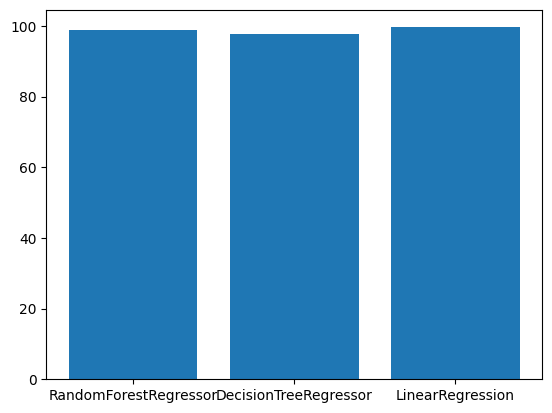

In [ ]:
import matplotlib.pyplot as plt
plt.bar([name[0].__name__ for name in errors.keys()], errors.values())
plt.show()

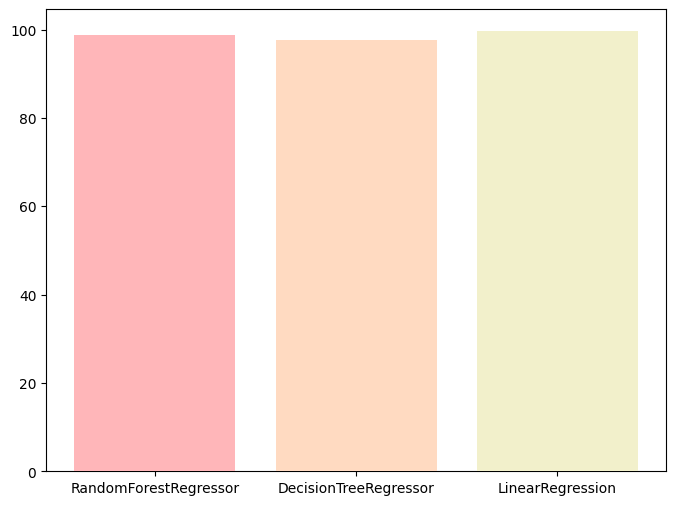

In [ ]:
import matplotlib.pyplot as plt
cute_colors=['#FFB6B9','#FFDAC1','#F2F0CB','#B5EAD7','#C7CEEA']
plt.figure(figsize=(8,6))
bars=plt.bar([name[0].__name__ for name in errors.keys()],errors.values(),color=cute_colors[:len(errors)])
for bar in bars:
  bar.set_linewidth(0)
  bar.set_edgecolor('none')
  bar.set_zorder(3)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   avg_glucose_level  4981 non-null   float64
 5   bmi                4981 non-null   float64
 6   smoking_status     4981 non-null   int64  
 7   stroke             4981 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 311.4 KB


/tmp/ipython-input-1914427465.py:31: UserWarning: Glyph 128062 (\N{PAW PRINTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


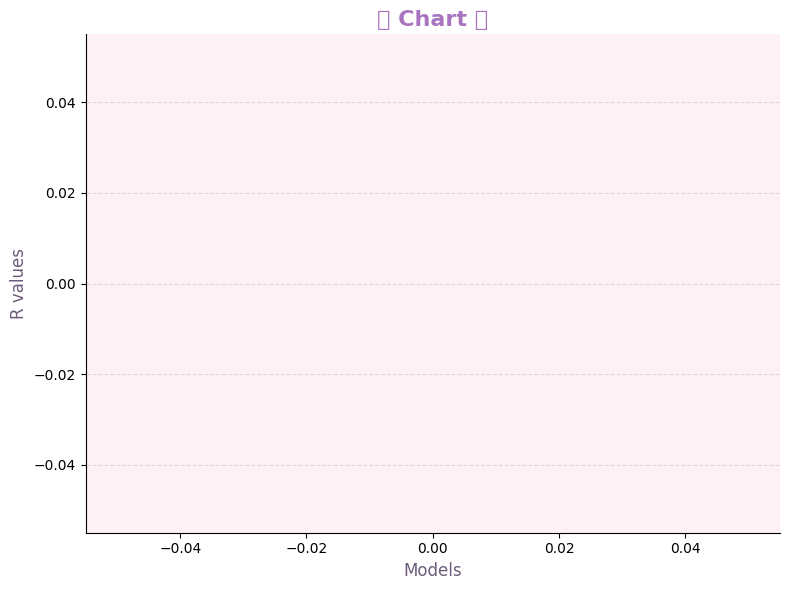

In [ ]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual 'errors' dictionary)

# Define a cute pastel color palette
cute_colors = ['#FFB6B9', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(errors.keys(), errors.values(), color=cute_colors[:len(errors)])

# Add rounded edges to bars
for bar in bars:
    bar.set_linewidth(0)
    bar.set_edgecolor('none')
    bar.set_zorder(3)

# Add labels and title with cute fonts
plt.title('🐾 Chart 🐾', fontsize=16, fontweight='bold', color='#A974BF')
plt.xlabel('Models', fontsize=12, color='#6C5B7B')
plt.ylabel('R values', fontsize=12, color='#6C5B7B')

# Set background color
plt.gca().set_facecolor('#FFF0F5')  # Light lavender pink
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Remove top and right border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()